# Performance Metrics For Classification Models

Once the model is trained, the next step is to evaluate its performance. There are different performance metrices that can be used to judge output of the model. In addition to model performance evaluation, these metrices are also very useful in comparing different models and choosing best performing model for given problem domain. 


In this tutorial, various performance matrices used in classification models are demonstrated. 
This includes, confusion matrix, precision, recall, ROC curve and AUC. In order to use these metrices,  scikit learn library that supports built-in functionality of these measures will be used. 

The data set used for demonstration is taken from medical domain. The name of the data set is 'heart disease' available at https://www.kaggle.com/ronitf/heart-disease-uci. The size of the data set is (303 x 14). It is a binary classification data set. 

The key steps followed in this tutorial to make you learn how to use performances metrices on given data set is detailed below:

1. Load data set

2. Create train and test data sets using Hold-out method

3. Use train data set to learn the model

4. Apply model on the test data

5. Use Scikit learn performance metrices for model evaluation

6. Interpret the results

It is important to note that this tutorial is to help you understand how to use different  performance metrices. The choice of classification model, selecting the models learning and testing enviornment(such as Hold-out, K-cross validation, repeated Hold-out, Leave one Out cross validation) is users specific. The performance metrices discussed in this tutorial can be applied on any classificaion model and are independent of choice of learning and testing enviornments. The key to these metrices is that they are only applicable when model is ready and is to be tested for its performance strengths. 


# 1. Import libraries

In [ ]:
# importing Pandas for data manipulation
import pandas as pd
import numpy as np

# importing decision tree classifier

from sklearn.tree import DecisionTreeClassifier

# importing method for Hold-out

from sklearn.model_selection import train_test_split 

#importing methods for model evaluation
from sklearn import metrics

# importing matplotlib for visualization
from matplotlib.pyplot import boxplot
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 2. Loading data set

In [ ]:
dataset = pd.read_csv("Data sets/heart.csv")
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


# 3. Creating Training and Test split

Training set will be used for model learning whereas, test set for performance evaluation

In [ ]:
# My_data contains all data points from My_data set from from first feature to 12th feature(indicator features)
My_data = dataset.iloc[:,0:13] 

# My_target contains class information which is 13th feature in the data set of 

My_data_target=dataset.iloc[:,13]


X_train, X_test, Y_train, Y_test = train_test_split(My_data, My_data_target, test_size=0.3, random_state=10)

print("The sample training data without target feature\n")
print(X_train.shape)
print("\nThe sample with only target feature\n")
print(Y_test.shape)

The sample training data without target feature

(212, 13)

The sample with only target feature

(91,)


# 4. Learning  Model Under Hold-out method

In [ ]:
# creating instance of Decision tree classifier

DT_model_Holdout = DecisionTreeClassifier()

# fitting the model to training data set
DT_model_Holdout.fit(X_train, Y_train)



DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

# 5. Testing Model on Test Data

In [ ]:
# Getting prediction on test set

DT_model_Holdout_pred_test= DT_model_Holdout.predict(X_test)

# 6. Measuring Models Performance

## 6.1 Estimating Models Accuracy

In [ ]:
# Computing Model Accuracy

print("Accuracy:",round(metrics.accuracy_score(Y_test, DT_model_Holdout_pred_test),2) * 100, "%")



Accuracy: 73.0 %


Accuracy of Decision Tree model is 75% using Hold-Out method

## 6.2 Printing Confusion Matrix

In [ ]:
print ("Confusion matrix")

print ("---------------")

Confusion_matrix=metrics.confusion_matrix(Y_test, DT_model_Holdout_pred_test)
print(Confusion_matrix)

Confusion matrix
---------------
[[32 18]
 [ 7 34]]


The output of confusion matrix indicates that: TN= 32, TP = 36, FP = 18 and FN = 5. The total wrong predictions made by the model are: FP + FN = 23 and total correct predictions are: TP + TN = 68. 

### 6.2.1 Printing Confusion Matrix Using Seaborn

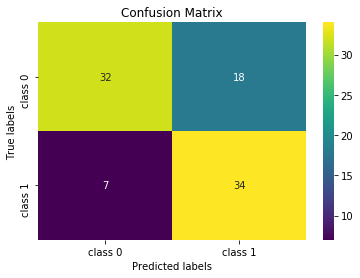

In [ ]:

ax= plt.subplot()
sns.heatmap(Confusion_matrix, annot=True, ax = ax, cmap="viridis"); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['class 0', 'class 1']); ax.yaxis.set_ticklabels(['class 0', 'class 1']);



Heatmap from Seaborn can be used for better visualization of confusion matrix. 

## 6.3 Printing Classification Report

In [ ]:
# Model detailed classification report
target_names = ['class 0', 'class 1']


print("The detailed Classification Report")
print("----------------------------------")
print(metrics.classification_report(Y_test, DT_model_Holdout_pred_test,target_names =target_names))

The detailed Classification Report
----------------------------------
              precision    recall  f1-score   support

     class 0       0.82      0.64      0.72        50
     class 1       0.65      0.83      0.73        41

    accuracy                           0.73        91
   macro avg       0.74      0.73      0.73        91
weighted avg       0.75      0.73      0.72        91



classfication_report() function in scikit learn allows to inspect performance of model on indicidual class. We can see that on class 0, precision is 86%(32/(32+5)) whereas, it is 67%(36/(36+18)) for class 1. It also detailed recall, f1-score and weighted average to judge model performance

## 6.4  Plotting ROC curve

ROC(Receiver Operating Characteristic) curve the true positive rate (Sensitivity) is plotted in function of the false positive rate (100-Specificity) for different cut-off points of a parameter. Each point on the ROC curve represents a sensitivity/specificity pair corresponding to a particular decision threshold. The area under the ROC curve (AUC) is a measure of how well a parameter can distinguish between two different classes in the present in the data set. The formula for TPR and FPR are following:

TPR = TP(TP+FN) and FPR = FP(FP+TN)

In order to plot ROC curve, we need to use predict_proba() method with the fitted function while model learning as it returns the probability of an instance belonging to different classes. For a binary classification problem, predict_proba() returns class probabilities for each class. The first column contains the probability of the first class and the second column contains the probability of the second class. In order to plot ROC, we use the second column to the probabilities generated by predict_proba() function and pass it to  metrics.auc().

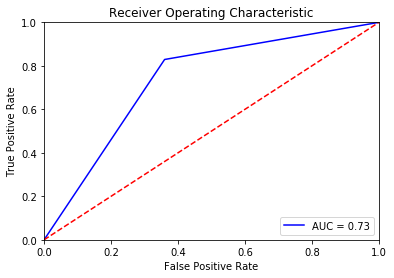

In [ ]:
# Using predict_proba() function on test data 
DT_model_pred_prob= DT_model_Holdout.predict_proba(X_test)
preds = DT_model_pred_prob[:,1]


# getting fpr, tpr values to plot ROC curve at different thresholds
fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# plotting ROC curve with AUC value
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



A good model has a closer  curve that follows the left-hand border and then the top border of the ROC space. Since the ROC curve achieved by decision tree models moves slightly away from left hand border shows average performance by the model. Also, AUC which stands for area under curve provides quantitative measure of the performance of the model. The value close to 100% indicates very good performance by the model. In the output we received by the model, AUC=76% does not indicate a very good performance by the model but, can be accpeted as avegrage performing model(subjective to data set domain and user's choice)